In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import SimpleExpSmoothing 
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head()



,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82


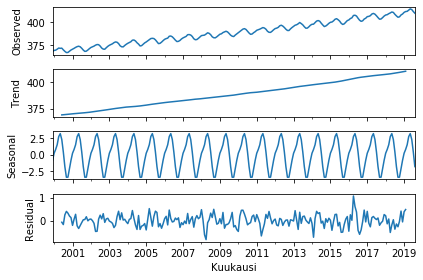

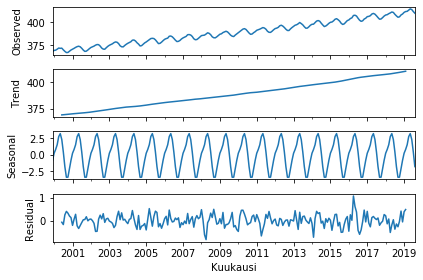

In [2]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df["CO2"]).plot()
# valitaan tämän perusteella malliksi Exponential Smoothing, koska aineistossa sekä trendi että kausivaihtelu

In [3]:
malli = ExponentialSmoothing(df["CO2"], seasonal_periods=12, trend="add", seasonal="mul").fit() 
#trendi nouseva, siksi "add"-vakiolisäys OK, säännöllinen kausivaihtelu --> "mul"-kerroin OK

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


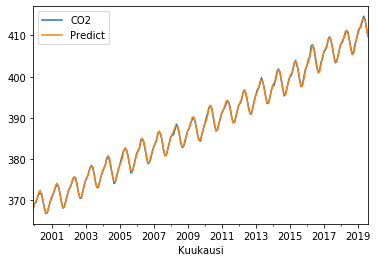

In [4]:
df["Predict"] = malli.fittedvalues 
df.plot()

In [5]:
tulos= sqrt(mean_squared_error(df["CO2"], df["Predict"]))

print(round(tulos,3 ))


0.308


In [6]:
tulos=mean_absolute_error(df["CO2"], df["Predict"])
print(round(tulos, 3))

0.24


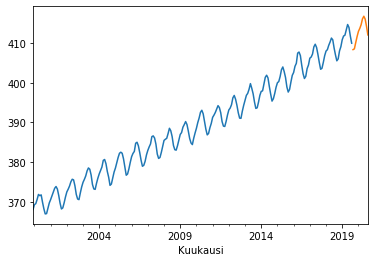

In [7]:
index = pd.date_range("2019-09-01", periods = 12, freq="MS")

datap = pd.DataFrame(malli.forecast(12), index=index) #https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-1/
datap.columns =["Predict"]

df["CO2"].plot()
datap["Predict"].plot()